In [32]:
import numpy as np
from scipy import fft
import cv2
import matplotlib.pyplot as plt

In [147]:
def homomorphic_filtering(x : np.array, gamma_h=0.4, gamma_l=1.6, c=1, D0=0.1):
    X = fft.fft2(np.log(x + 0.00001))

    d_center = (np.array(X.shape) - 1) / 2
    d = np.array([np.sqrt((range(x.shape[0]) - d_center[0])**2 + (i - d_center[1])**2) for i in range(x.shape[1])]).T
    H = (gamma_h - gamma_l) * (1 - np.exp(-c * d**2 / (D0 * x.shape[0])**2)) + gamma_l

    Y = np.multiply(X, H)
    y = np.exp(fft.ifft2(Y).real)
    return y

In [55]:
img = cv2.imread('../resources/tun.jpg', cv2.IMREAD_GRAYSCALE)

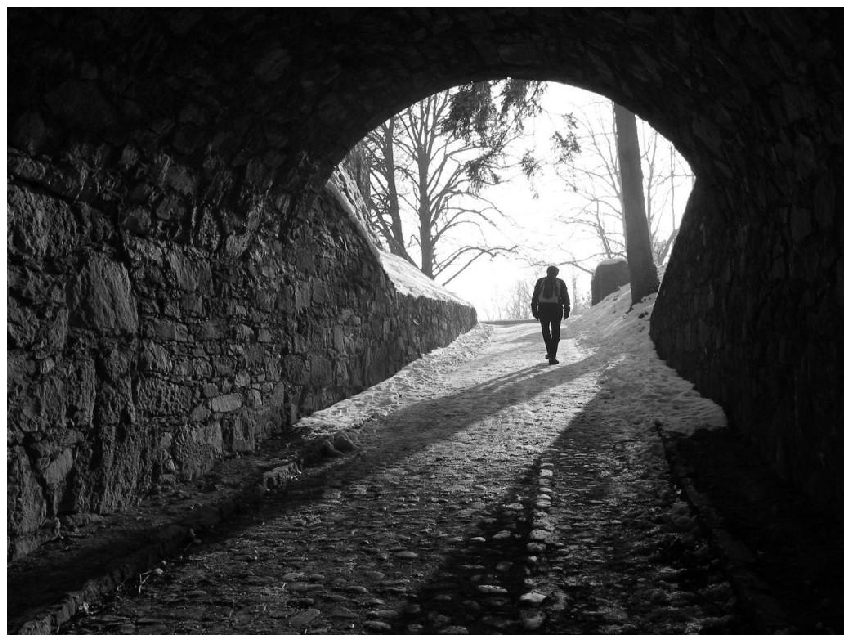

In [56]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.axis('off')
plt.imshow(img, cmap='gray')

In [149]:
img_f = homomorphic_filtering(img)

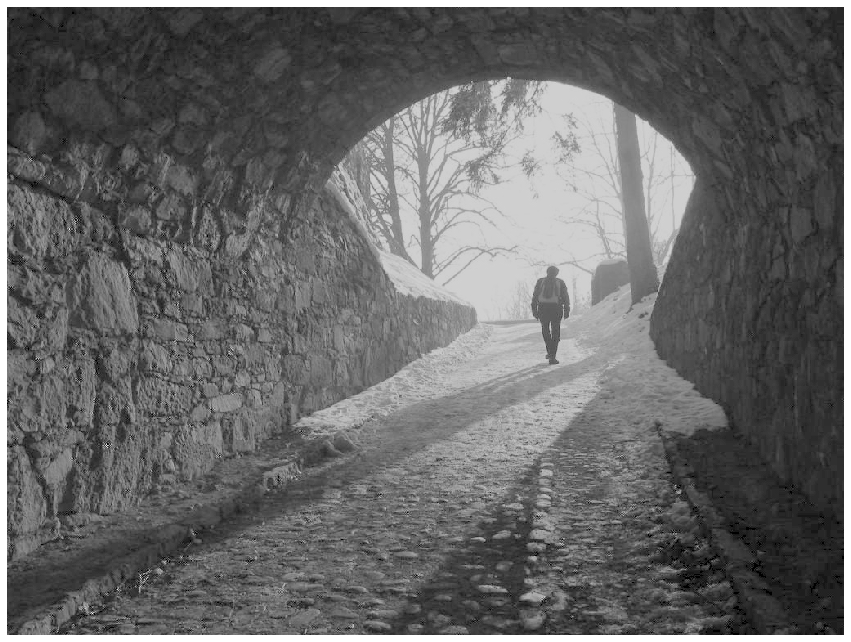

In [150]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.axis('off')
plt.imshow(img_f, cmap='gray')